# Week 3: Subplots

In [18]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


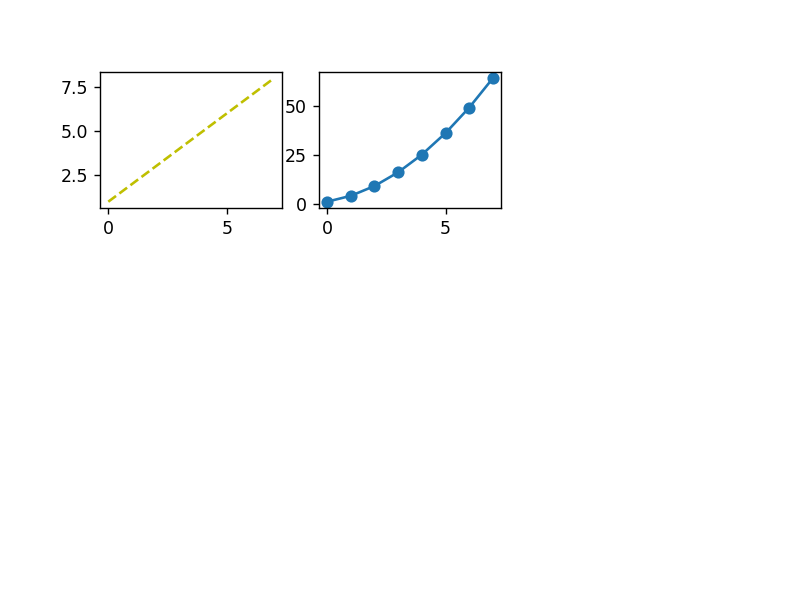

In [19]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(3, 3, 1, facecolor = 'w')

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '--', color = 'y')

In [20]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(3, 3, 2)
plt.plot(exponential_data, '-o')

In [8]:
# plot exponential data on 1st subplot axes
plt.subplot(3, 3, 1)
plt.plot(exponential_data, '-x')

/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<IPython.core.display.Javascript object>


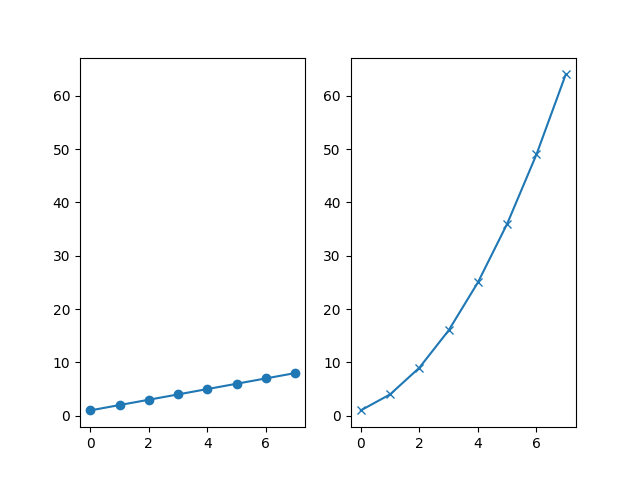

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


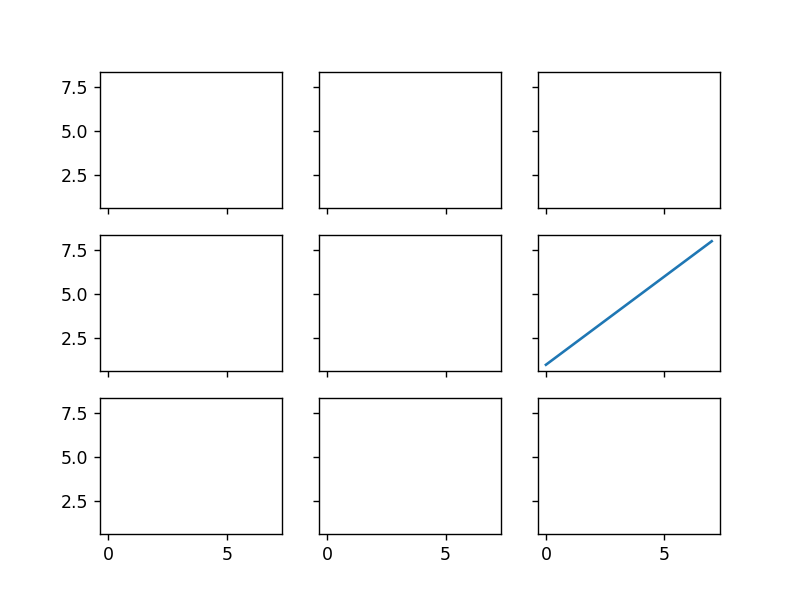

In [21]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax6.plot(linear_data, '-')

In [31]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels()+ ax.get_yticklabels() :
        label.set_visible(False)
        

In [32]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


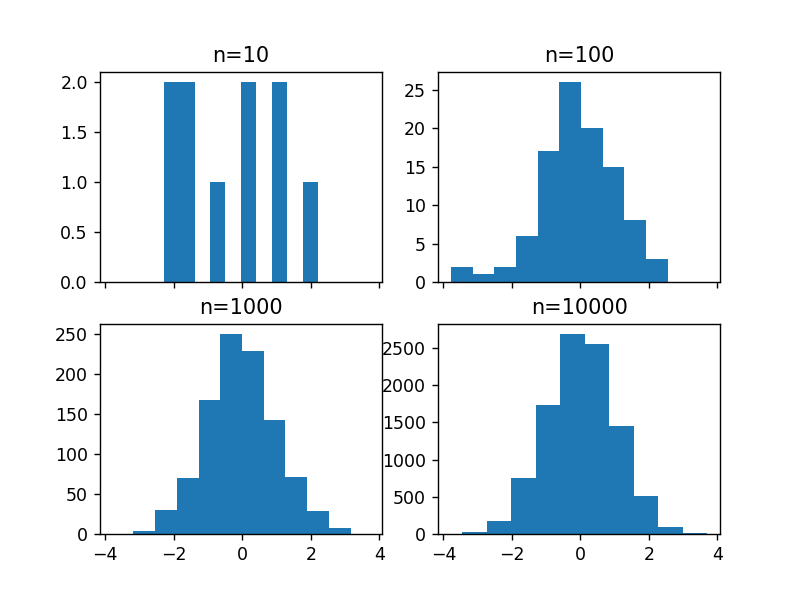

In [33]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


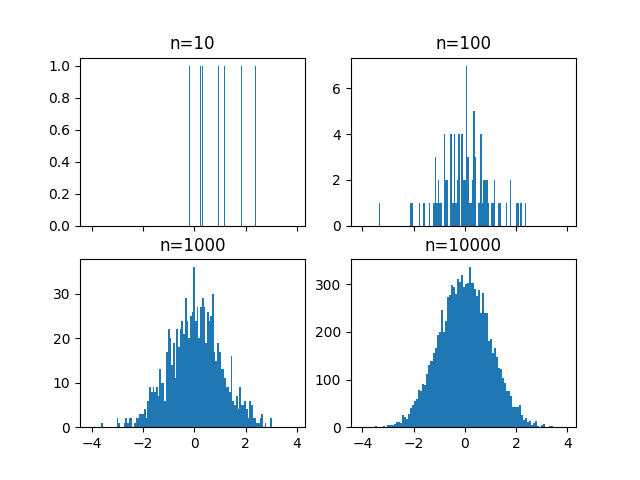

In [13]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


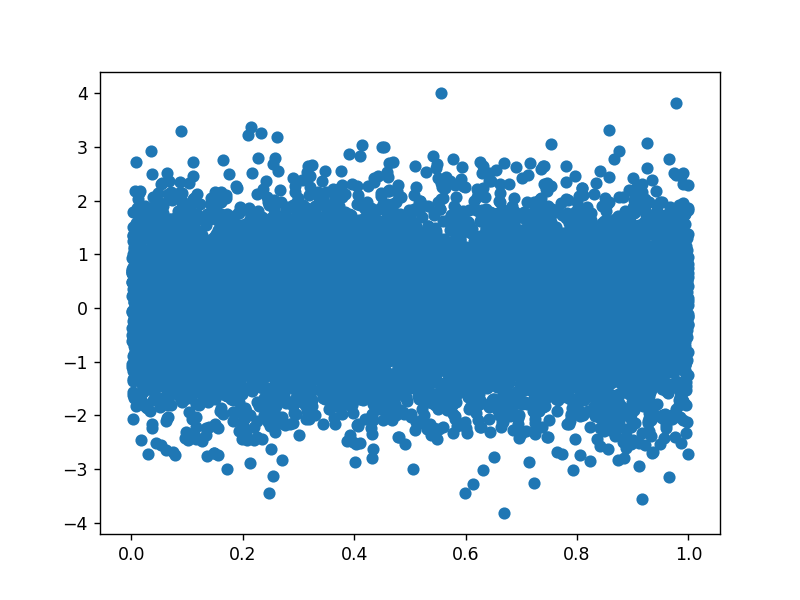

In [35]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

# Box and Whisker Plots

In [45]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [46]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.021634,0.496937,1.999950
std,0.994022,0.289522,1.402126
min,-3.658356,0.000021,0.006698
25%,-0.663376,0.244777,0.968411
50%,0.031423,0.498298,1.677976
75%,0.683214,0.748098,2.706528
max,4.086490,0.999953,10.950458


<IPython.core.display.Javascript object>


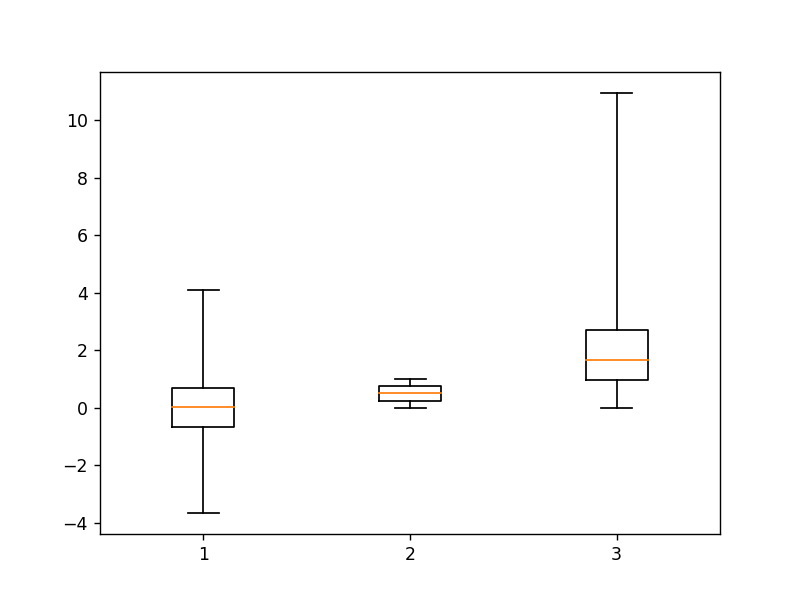

In [47]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [48]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


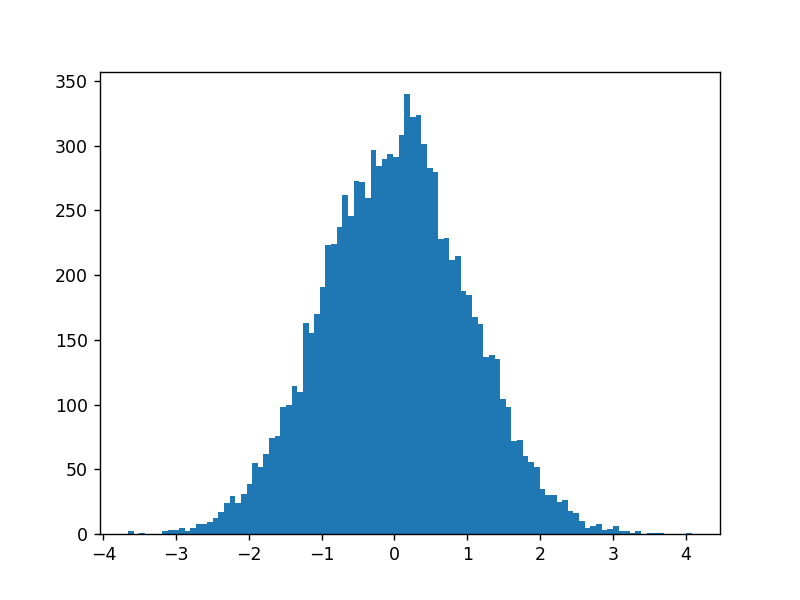

In [51]:
plt.figure()
_ = plt.hist(df['normal'], bins=100)

<IPython.core.display.Javascript object>


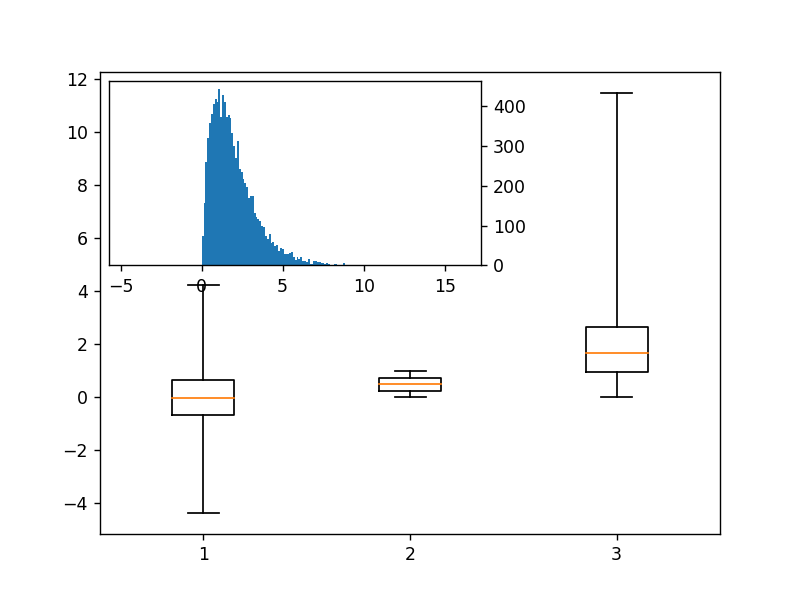

In [42]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [52]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


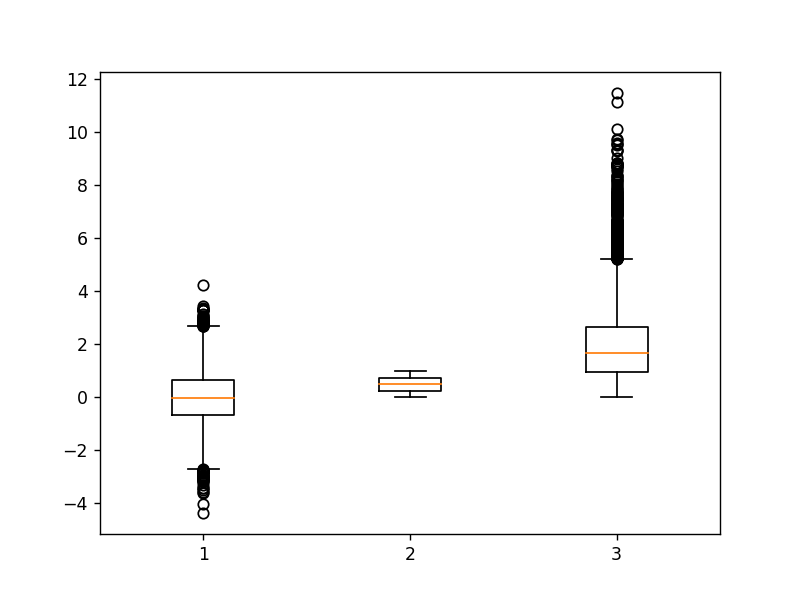

In [43]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


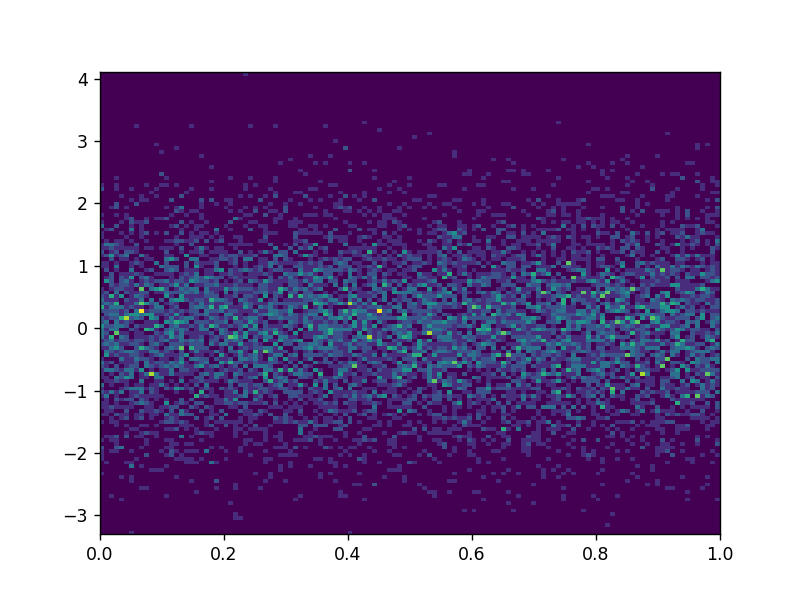

In [44]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=125)

<IPython.core.display.Javascript object>


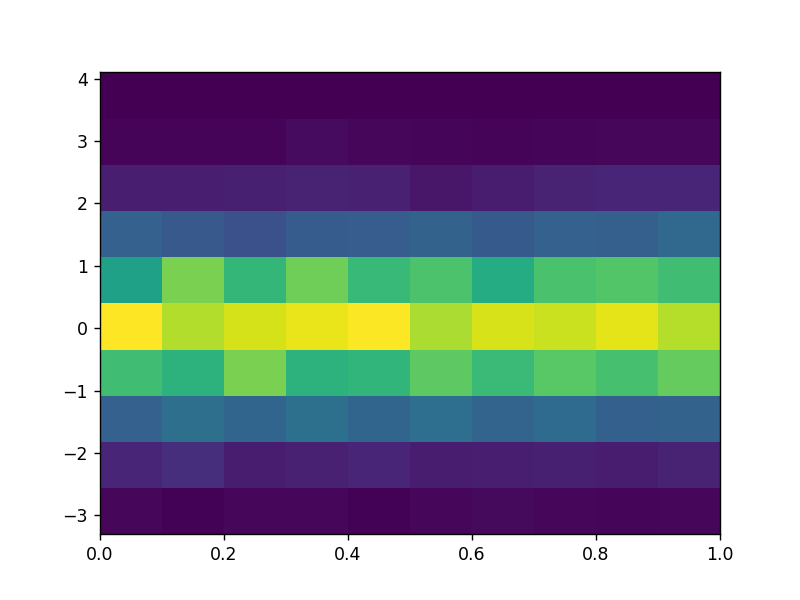

In [55]:
plt.figure()
_ = plt.hist2d(X, Y, bins=10)

In [34]:
# add a colorbar legend
plt.colorbar()

# Animations

In [56]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [57]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


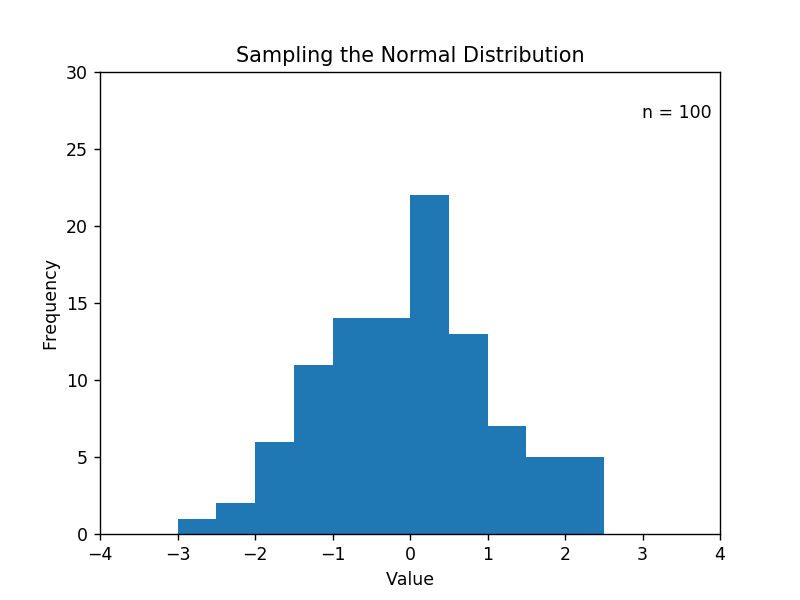

In [58]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=1000)

# Interactivity

<IPython.core.display.Javascript object>


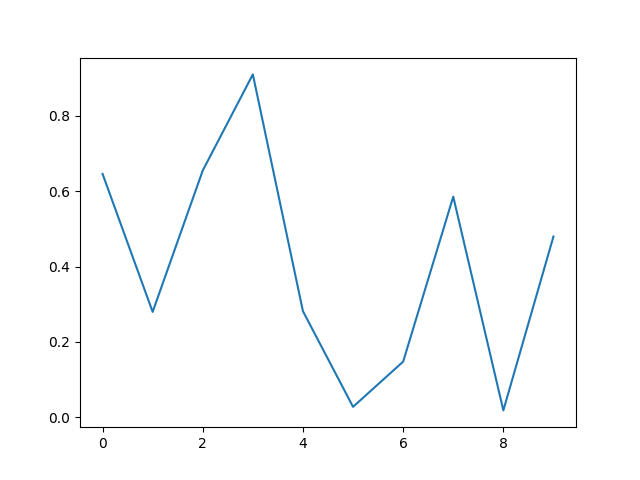

7

In [39]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [40]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.869977,Canada,0.953119
1,0.234500,Brazil,0.711559
2,0.458686,UK,0.497045
3,0.147216,Germany,0.047118
4,0.243602,Iraq,0.921562
5,0.954778,Chile,0.073003
6,0.950421,India,0.965962
7,0.880711,USA,0.546395
8,0.041542,Mexico,0.001110
9,0.475197,China,0.385382


<IPython.core.display.Javascript object>


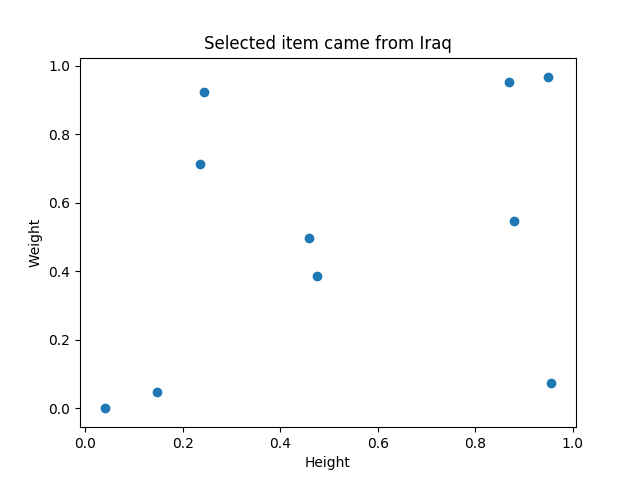

In [42]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [43]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7